In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt 

def F(A, x, b):
    Ax = A @ x
    diff = Ax - b
    result = diff.T @ diff
    return result

def gradiente_F(A, b, x):
    Ax_menos_b = A @ x - b
    gradiente = 2 * A.T @ Ax_menos_b
    return gradiente

def F2(A, x, b, delta):
    Fx = F(A, x, b)
    norm_x_squared = np.linalg.norm(x) ** 2
    result = Fx + delta * norm_x_squared
    return result

def gradiente_F2(A, b, x, delta):
    grad_F = gradiente_F(A, b, x)
    grad_F2 = grad_F + 2 * delta * x
    return grad_F2

def maximo_valor_principal(A):
    _, S, _ = np.linalg.svd(A, full_matrices=False)
    return np.max(S)

def pseudo_inverse(matriz):
    u, s, v_T = np.linalg.svd(matriz, full_matrices=False)
    s_inv = invert_diagonal_matrix(np.diag(s))
    return v_T.T @ np.diag(s_inv) @ u.T

def invert_diagonal_matrix(diagonal_matrix):
    n = len(diagonal_matrix)
    inverse_diagonal_matrix = np.zeros((n, n))
    for i in range(n):
        if diagonal_matrix[i, i] >= 1e-10:
            inverse_diagonal_matrix[i, i] = 1 / diagonal_matrix[i, i]
        else:
            inverse_diagonal_matrix[i, i] = 0
    
    return np.diag(inverse_diagonal_matrix)

def SVD_solution (A, b):
    return pseudo_inverse(A) @ b

def random_matrix(n, d):
    return np.random.uniform(-1, 1, (n, d))

def random_vector(n):
    return np.random.uniform(-1, 1, n)

# def generate_matrix_with_singular_values_magnitude(n, d, magnitud):
#     s = np.random.rand(n)
#     s_magnitud = sorted(magnitud * s)
#     s_base = np.zeros((n, d))
#     for i in range(n):
#         if i < d:
#             s_base[i, i] = s_magnitud[i]
#     A = np.random.rand(n, d)
#     u, _, vt = np.linalg.svd(A)
#     A_reconstruido = u @ s_base @ vt
#     return A_reconstruido

def generate_matrix_with_singular_values_magnitudes(n, d, magnitude): 
    A = np.random.rand(n, d)
    u, s, vt = np.linalg.svd(A, full_matrices=False)
    s = magnitude * (s / np.linalg.norm(s, ord=2))
    A = u @ np.diag(s) @ vt
    return A

def generate_matrix_with_H_eigenval_magnitude(n, d, b, magnitud):
    A = np.random.rand(n, d)
    def hessiana(A):
        return 2 * A.T @ A
    H = hessiana(A)
    autovalores = np.linalg.eigvals(H)
    factor = magnitud / np.mean(np.abs(autovalores))
    A_ajustada = A * np.sqrt(factor)
    return A_ajustada

def gradient_decent(A, b, x0, delta, tol, max_iter, gradient):
    x = x0
    xs = [x]
    for i in range(max_iter):
        gradiente = gradient(A, b, x)
        if np.linalg.norm(gradiente) < tol:
            break
        x = x - delta * gradiente
        xs.append(x)
    return xs

def gradient_descent(A, B, x0, step, delta, max_iter):
    x = x0
    xs = [x]
    for i in range(max_iter - 1):
        gradiente = gradiente_F2(A, B, x, delta)
        x = x - step * gradiente
        xs.append(x)
    return xs

Gráfico de la convergencia del método de gradiente descendente para F con distintas magnitudes de los autovalores de H

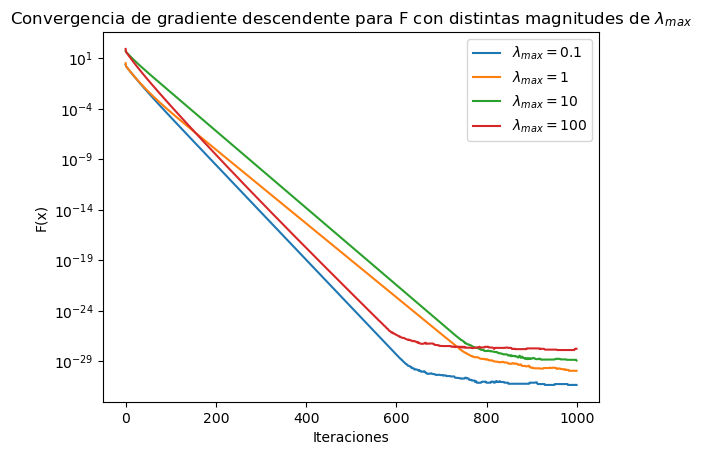

In [3]:
# Gráfico de la convergencia del método de gradiente descendente para F con distintas magnitudes de los autovalores de H
b0 = random_vector(5)
x0 = random_vector(100)
delta = 0

A0 = generate_matrix_with_H_eigenval_magnitude(5, 100, b0, 0.1)
_, s0, _ = np.linalg.svd(2 * A0.T @ A0, full_matrices=False)
step0 = 1 / max(s0)
A1 = generate_matrix_with_H_eigenval_magnitude(5, 100, b0,  1)
_, s1, _ = np.linalg.svd(2 * A1.T @ A1, full_matrices=False)
step1 = 1 / max(s1)
A2 = generate_matrix_with_H_eigenval_magnitude(5, 100, b0, 10)
_, s2, _ = np.linalg.svd(2 * A2.T @ A2, full_matrices=False)
step2 = 1 / max(s2)
A3 = generate_matrix_with_H_eigenval_magnitude(5, 100, b0, 100)
_, s3, _ = np.linalg.svd(2 * A3.T @ A3, full_matrices=False)
step3 = 1 / max(s3)

plt.plot([F(A0, x, b0) for x in gradient_descent(A0, b0, x0, step0, delta, 1000)], label=r'$\lambda_{max} = 0.1$')
plt.plot([F(A1, x, b0) for x in gradient_descent(A1, b0, x0, step1, delta, 1000)], label=r'$\lambda_{max} = 1$')
plt.plot([F(A2, x, b0) for x in gradient_descent(A2, b0, x0, step2, delta, 1000)], label=r'$\lambda_{max} = 10$')
plt.plot([F(A3, x, b0) for x in gradient_descent(A3, b0, x0, step3, delta, 1000)], label=r'$\lambda_{max} = 100$')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('F(x)')
plt.title(r'Convergencia de gradiente descendente para F con distintas magnitudes de $\lambda_{max}$')
plt.legend()
plt.show()

In [4]:
# Gráfico del error final para distintos valores de lambda max


Convergencia para F con distintos valores para s (arbitrarios)

0.7300830415618932 1.228147796579183 1.3746891716779654 1.3916038456615447 0.13927277391421772 9.403161382260007e-08 0.0


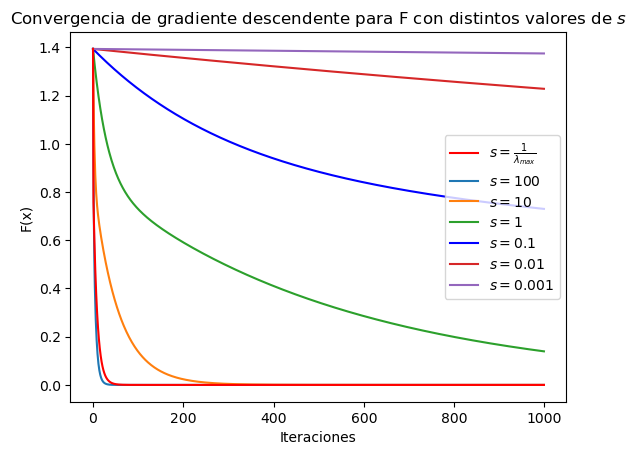

In [5]:
# Convergencia para F con distintos valores para s (arbitrarios)

b0 = random_vector(5)
x0 = random_vector(100)
delta = 0

A0 = generate_matrix_with_singular_values_magnitudes(5, 100, 0.1)


steps = [0.1, 0.01, 0.001, 0.0001, 1, 10, 100]
_, sH, _ = np.linalg.svd(2 * A0.T @ A0, full_matrices=False)
step_H = 1 / max(sH)

plt.plot([F(A0, x, b0) for x in gradient_descent(A0, b0, x0, step_H, delta, 1000)], label=r'$s = \frac{1}{\lambda_{max}}$', zorder=10, color='red')
plt.plot([F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[6], delta, 1000)], label=r'$s = 100$')
plt.plot([F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[5], delta, 1000)], label=r'$s = 10$')
plt.plot([F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[4], delta, 1000)], label=r'$s = 1$')
plt.plot([F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[0], delta, 1000)], label=r'$s = 0.1$', color='b')
plt.plot([F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[1], delta, 1000)], label=r'$s = 0.01$')
plt.plot([F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[2], delta, 1000)], label=r'$s = 0.001$')
# plt.plot([F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[3], delta, 1000)], label=r'$s = 0.0001$')
# plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('F(x)')
plt.title(r'Convergencia de gradiente descendente para F con distintos valores de $s$')
plt.legend()

#Errores finales para distintos valores de s
a = [F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[0], delta, 1000)]
b = [F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[1], delta, 1000)]
c = [F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[2], delta, 1000)]
d = [F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[3], delta, 1000)]
e = [F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[4], delta, 1000)]
f = [F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[5], delta, 1000)]
g = [F(A0, x, b0) for x in gradient_descent(A0, b0, x0, steps[6], delta, 1000)]
h = [F(A0, x, b0) for x in gradient_descent(A0, b0, x0, step_H, delta, 1000)]
print(a[-1], b[-1], c[-1], d[-1], e[-1], f[-1], g[-1])


Gráfico de variación de delta de manera arbitraria para F2

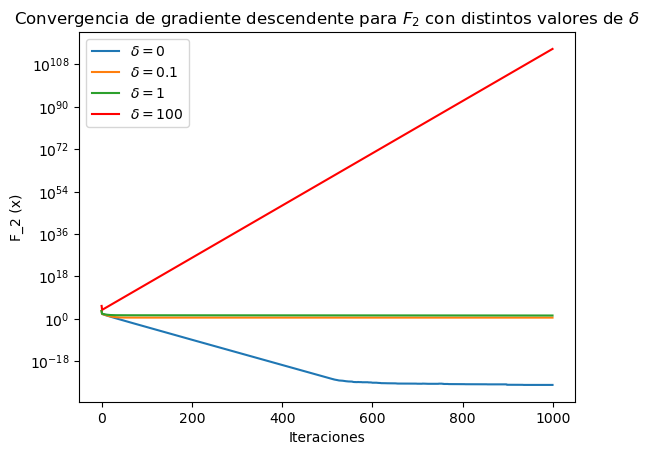

In [6]:
#Gráfico de variación de delta de manera arbitraria para F2

b0 = random_vector(5)
x0 = random_vector(100)
deltas = [0, 0.01, 0.1, 1]
A0 = generate_matrix_with_singular_values_magnitudes(5, 100, 100)
_, s0, _ = np.linalg.svd(2 * A0.T @ A0, full_matrices=False)
step0 = 1 / max(s0)

_, s, _ = np.linalg.svd(A0, full_matrices=False)
delta_posta = (10**2)*max(s)

plt.plot([F2(A0, x, b0, deltas[0]) for x in gradient_descent(A0, b0, x0, step0, deltas[0], 1000)], label=r'$\delta = 0$')
# # plt.plot([F2(A0, x, b0, deltas[1]) for x in gradient_descent(A0, b0, x0, step0, deltas[1], 1000)], label=r'$\delta = 0.01$')
plt.plot([F2(A0, x, b0, deltas[2]) for x in gradient_descent(A0, b0, x0, step0, deltas[2], 1000)], label=r'$\delta = 0.1$')
plt.plot([F2(A0, x, b0, deltas[3]) for x in gradient_descent(A0, b0, x0, step0, deltas[3], 1000)], label=r'$\delta = 1$')
plt.plot([F2(A0, x, b0, delta_posta) for x in gradient_descent(A0, b0, x0, step0, delta_posta, 1000)], label=r'$\delta = 100$', color='red')

plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel(r'F_2 (x)')
plt.title(r'Convergencia de gradiente descendente para $F_2$ con distintos valores de $\delta$')
plt.legend()
plt.show()

Gráfico de la convergencia del método de gradiente descendente para F2 con distintas magnitudes de los autovalores de H (Este gráfico no lo voy a usar)

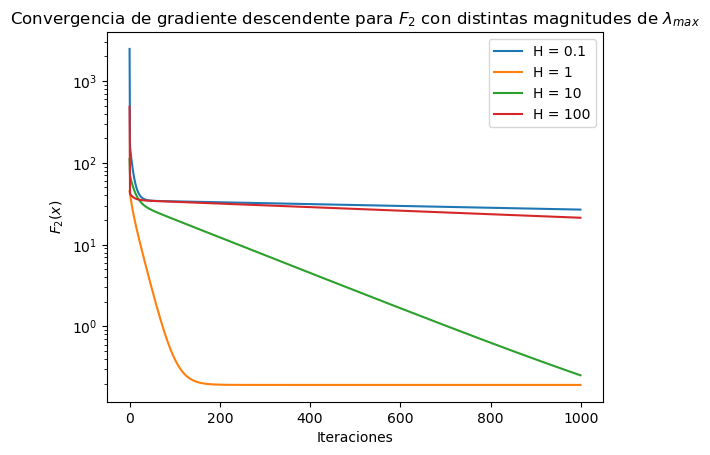

In [7]:
# Gráfico de la convergencia del método de gradiente descendente para F2 con distintas magnitudes de los autovalores de H
# Agarro las mismas matrices que antes y las uso para F2
delta = 1
plt.plot([F2(A0, x, b0, delta) for x in gradient_descent(A0, b0, x0, step0, delta, 1000)], label='H = 0.1')
plt.plot([F2(A1, x, b0, delta) for x in gradient_descent(A1, b0, x0, step1, delta, 1000)], label='H = 1')
plt.plot([F2(A2, x, b0, delta) for x in gradient_descent(A2, b0, x0, step2, delta, 1000)], label='H = 10')
plt.plot([F2(A3, x, b0, delta) for x in gradient_descent(A3, b0, x0, step3, delta, 1000)], label='H = 100')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel(r'$F_2 (x)$')
plt.title(r'Convergencia de gradiente descendente para $F_2$ con distintas magnitudes de $\lambda_{max}$')
plt.legend()
plt.show()

Gráfico de la convergencia del gradiente descendiente para distintas magnitudes de valores singulares de A

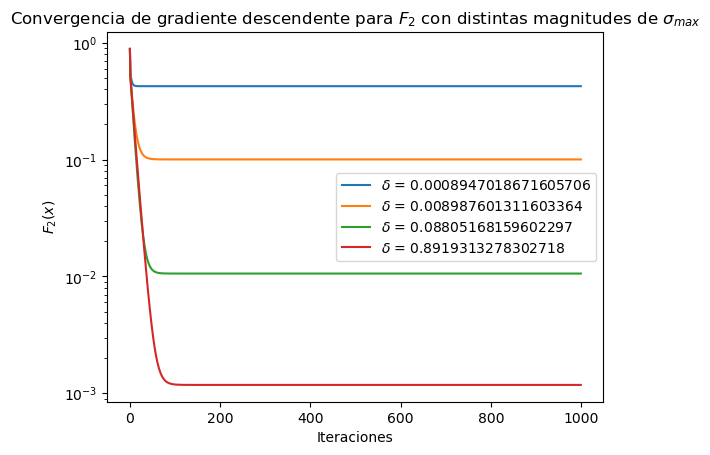

Numero de condicion de A0:  4.3473256943085925
Numero de condicion de A1:  4.74746768052466
Numero de condicion de A2:  4.037918029276244
Numero de condicion de A3:  4.399761790963004


In [8]:
# Gráfico de la convergencia del gradiente descendiente para distintas magnitudes de valores singulares de A
A0_sigma = generate_matrix_with_singular_values_magnitudes(5, 100, 0.1)
_, s0, _ = np.linalg.svd(2 * A0_sigma.T @ A0_sigma, full_matrices=False)
step0 = 1 / max(s0)
_, s0, _ = np.linalg.svd(A0_sigma, full_matrices=False)
delta0 = (10**(-2))* max(s0)

A1_sigma = generate_matrix_with_singular_values_magnitudes(5, 100, 1)
_, s1, _ = np.linalg.svd(2 * A1_sigma.T @ A1_sigma, full_matrices=False)
step1 = 1 / max(s1)
_, s1, _ = np.linalg.svd(A1_sigma, full_matrices=False)
delta1 = (10**(-2))* max(s1)

A2_sigma = generate_matrix_with_singular_values_magnitudes(5, 100, 10)
_, s2, _ = np.linalg.svd(2 * A2_sigma.T @ A2_sigma, full_matrices=False)
step2 = 1 / max(s2)
_, s2, _ = np.linalg.svd(A2_sigma, full_matrices=False)
delta2 = (10**(-2))* max(s2)

A3_sigma = generate_matrix_with_singular_values_magnitudes(5, 100, 100)
_, s3, _ = np.linalg.svd(2 * A3_sigma.T @ A3_sigma, full_matrices=False)
step3 = 1 / max(s3)
_, s3, _ = np.linalg.svd(A3_sigma, full_matrices=False)
delta3 = (10**(-2))* max(s3)

x0 = np.zeros(100)
plt.plot([F2(A0_sigma, x, b0, delta0) for x in gradient_descent(A0_sigma, b0, x0, step0, delta0, 1000)], label=r'$\delta$ = '+str(delta0))
plt.plot([F2(A1_sigma, x, b0, delta1) for x in gradient_descent(A1_sigma, b0, x0, step1, delta1, 1000)], label=r'$\delta$ = '+str(delta1))
plt.plot([F2(A2_sigma, x, b0, delta2) for x in gradient_descent(A2_sigma, b0, x0, step2, delta2, 1000)], label=r'$\delta$ = '+str(delta2))
plt.plot([F2(A3_sigma, x, b0, delta3) for x in gradient_descent(A3_sigma, b0, x0, step3, delta3, 1000)], label=r'$\delta$ = '+str(delta3))
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel(r'$F_2 (x)$')
plt.title(r'Convergencia de gradiente descendente para $F_2$ con distintas magnitudes de $\sigma_{max}$')
plt.legend()
plt.show()

#calcular numero de condicion de cada matriz

print('Numero de condicion de A0: ', np.max(s0)/np.min(s0))
print('Numero de condicion de A1: ', np.max(s1)/np.min(s1))
print('Numero de condicion de A2: ', np.max(s2)/np.min(s2))
print('Numero de condicion de A3: ', np.max(s3)/np.min(s3))


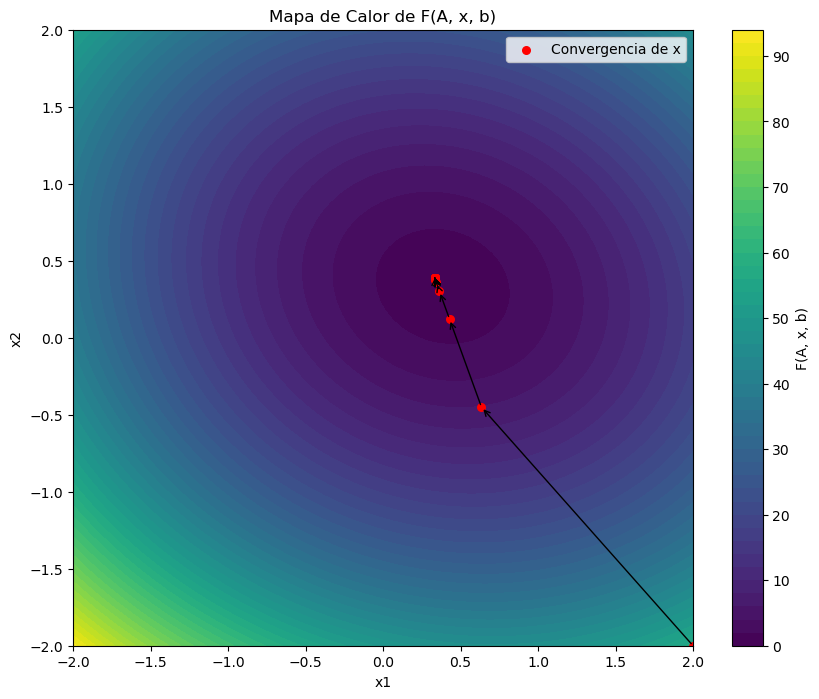

In [9]:
#F mapa de calor CON A NORMAL 0 1
n, d = 5, 2

# Generar matriz A y vector b
np.random.seed(0)
A = np.random.randn(n, d)
b = np.random.randn(n)

autovaloresA = np.linalg.svd(A, full_matrices=False)[1]
hessiano = 2 * A.T @ A
autovaloresH = np.linalg.eigvalsh(hessiano)
delta = 10**(-2)*np.max(np.diag(autovaloresA))

# Crear un rango de valores para x1 y x2
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)

# Evaluar F en cada par (x1, x2)
F_values = np.zeros((len(x1_range), len(x2_range)))

for i, x1 in enumerate(x1_range):
    for j, x2 in enumerate(x2_range):
        x = np.zeros(d)
        x[0] = x1
        x[1] = x2
        F_values[i, j] = F(A, x, b)

plt.figure(figsize=(10, 8))
plt.contourf(x1_range, x2_range, F_values, levels=50, cmap='viridis')
plt.colorbar(label='F(A, x, b)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mapa de Calor de F(A, x, b)')

# Descenso de gradiente
step = 1 / np.max(autovaloresH)
max_iter = 1000

xs = gradient_descent(A, b, np.array([2,-2]), step, 0, max_iter)

# Extraer las primeras dos componentes de x para cada iteración
x1_vals = [x[0] for x in xs]
x2_vals = [x[1] for x in xs]

# Graficar la convergencia de las soluciones sobre el mapa de calor
plt.scatter(x1_vals, x2_vals, color='red', marker='o', s=30, label='Convergencia de x')
for i in range(1, len(xs)):
    plt.annotate('', xy=xs[i], xytext=xs[i-1],
                 arrowprops={'arrowstyle': '->', 'color': 'k', 'lw': 1},
                 va='center', ha='center')
plt.legend()
plt.show()

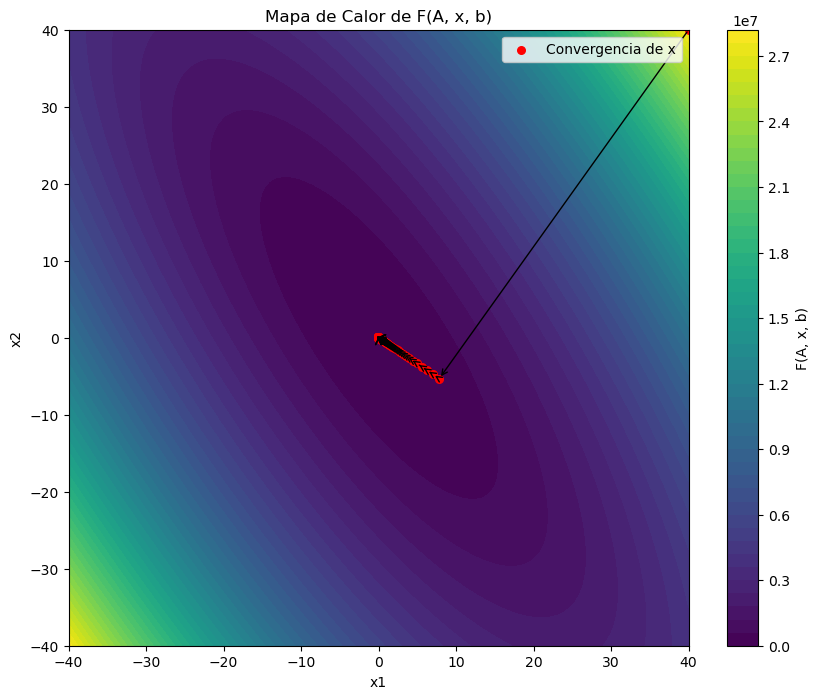

In [10]:
#F mapa de calor CON generate_matrix_with_singular_values_magnitudes
n, d = 5, 2

# Generar matriz A y vector b
A = generate_matrix_with_singular_values_magnitudes(n, d, 100)
b = np.random.randn(n)

autovaloresA = np.linalg.svd(A, full_matrices=False)[1]
hessiano = 2 * A.T @ A
autovaloresH = np.linalg.eigvalsh(hessiano)
delta = 10**(-2)*np.max(np.diag(autovaloresA))

# Crear un rango de valores para x1 y x2
x1_range = np.linspace(-40, 40, 100)
x2_range = np.linspace(-40, 40, 100)

# Evaluar F en cada par (x1, x2)
F_values = np.zeros((len(x1_range), len(x2_range)))

for i, x1 in enumerate(x1_range):
    for j, x2 in enumerate(x2_range):
        x = np.zeros(d)
        x[0] = x1
        x[1] = x2
        F_values[i, j] = F(A, x, b)

plt.figure(figsize=(10, 8))
plt.contourf(x1_range, x2_range, F_values, levels=50, cmap='viridis')
plt.colorbar(label='F(A, x, b)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mapa de Calor de F(A, x, b)')

# Descenso de gradiente
step = 1 / np.max(autovaloresH)
max_iter = 1000

xs = gradient_descent(A, b, np.array([40,40]), step, 0, max_iter)

# Extraer las primeras dos componentes de x para cada iteración
x1_vals = [x[0] for x in xs]
x2_vals = [x[1] for x in xs]

# Graficar la convergencia de las soluciones sobre el mapa de calor
plt.scatter(x1_vals, x2_vals, color='red', marker='o', s=30, label='Convergencia de x')
for i in range(1, len(xs)):
    plt.annotate('', xy=xs[i], xytext=xs[i-1],
                 arrowprops={'arrowstyle': '->', 'color': 'k', 'lw': 1},
                 va='center', ha='center')
plt.legend()
plt.show()

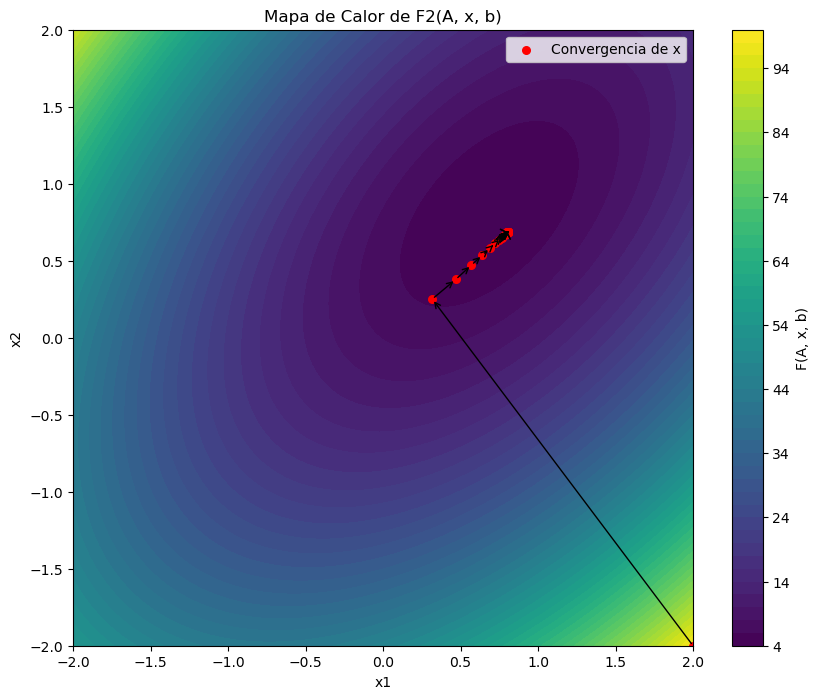

In [11]:
#F2 mapa de calor con A normal
n, d = 5, 2

# Generar matriz A y vector b
np.random.seed(1)
A = np.random.randn(n, d)
b = np.random.randn(n)

autovaloresA = np.linalg.svd(A, full_matrices=False)[1]
hessiano = 2 * A.T @ A
autovaloresH = np.linalg.eigvalsh(hessiano)
delta = 10**(-2)*np.max(np.diag(autovaloresA))

# Crear un rango de valores para x1 y x2
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-2, 2, 100)

# Evaluar F en cada par (x1, x2)
F_values = np.zeros((len(x1_range), len(x2_range)))

for i, x1 in enumerate(x1_range):
    for j, x2 in enumerate(x2_range):
        x = np.zeros(d)
        x[0] = x1
        x[1] = x2
        F_values[i, j] = F2(A, x, b, delta)

plt.figure(figsize=(10, 8))
plt.contourf(x1_range, x2_range, F_values, levels=50, cmap='viridis')
plt.colorbar(label='F(A, x, b)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Mapa de Calor de F2(A, x, b)')

# Descenso de gradiente
step = 1 / np.max(autovaloresH)
max_iter = 1000
tol = 1e-6

xs = gradient_descent(A, b, np.array([2,-2]), step, delta, max_iter)

# Extraer las primeras dos componentes de x para cada iteración
x1_vals = [x[0] for x in xs]
x2_vals = [x[1] for x in xs]

plt.scatter(x1_vals, x2_vals, color='red', marker='o', s=30, label='Convergencia de x')
for i in range(1, len(xs)):
    plt.annotate('', xy=xs[i], xytext=xs[i-1],
                 arrowprops={'arrowstyle': '->', 'color': 'k', 'lw': 1},
                 va='center', ha='center')
plt.legend()
plt.show()

In [12]:
#SVD
n, d = 5, 100
np.random.seed(0)
A = np.random.randn(n, d)
# A = generate_matrix_with_singular_values_magnitudes(n, d, 100)
b = np.random.randn(n)
x = SVD_solution(A, b)

autovaloresA = np.linalg.svd(A, full_matrices=False)[1]
hessiano = 2 * A.T @ A
autovaloresH = np.linalg.eigvalsh(hessiano)
delta = 10**(-2)*np.max(np.diag(autovaloresA))

step = 1 / np.max(autovaloresH)
max_iter = 1000

xs = gradient_descent(A, b, np.zeros(d), step, delta, max_iter)

print (np.linalg.norm(x - xs[len(xs)-1]))

0.00018374424726469126


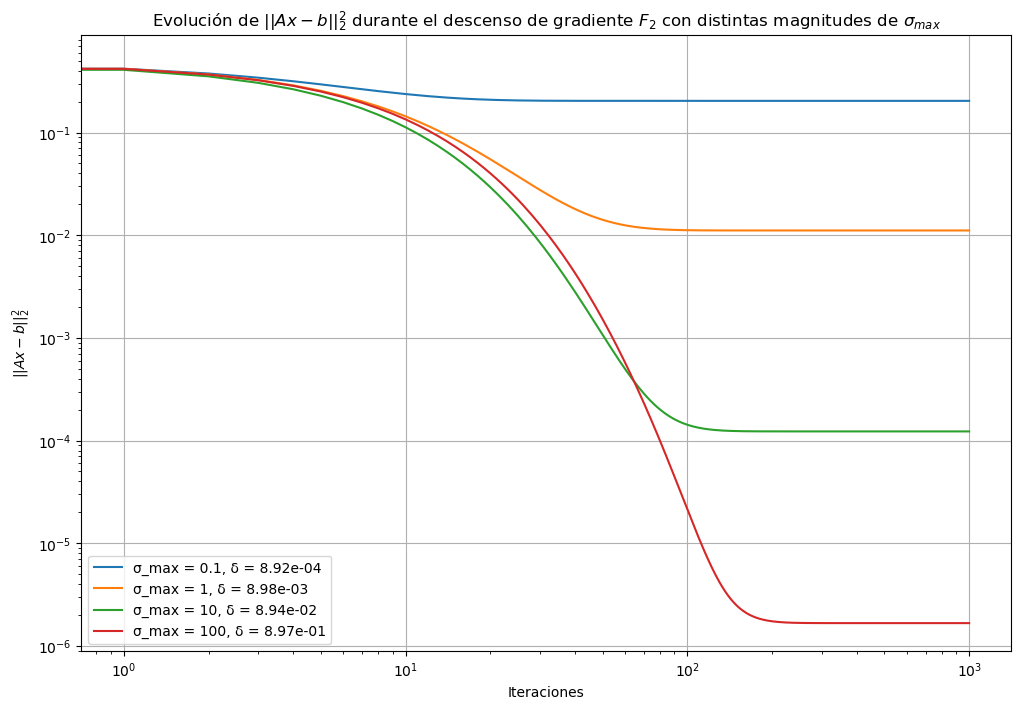

In [13]:
#||Ax-b||^2 vs iteraciones
# Generación de matrices y parámetros
n, d = 5, 100
b0 = random_vector(n)
x0 = np.zeros(100)

matrices = []
steps = []
deltas = []
magnitudes = [0.1, 1, 10, 100]

for magnitude in magnitudes:
    A = generate_matrix_with_singular_values_magnitudes(n, d, magnitude)
    _, s, _ = np.linalg.svd(2 * A.T @ A, full_matrices=False)
    step = 1 / max(s)
    _, s, _ = np.linalg.svd(A, full_matrices=False)
    delta = (10**(-2)) * max(s)
    
    matrices.append(A)
    steps.append(step)
    deltas.append(delta)

# Cálculo de ||Ax-b||^2 para cada matriz
plt.figure(figsize=(12, 8))

for i, (A, step, delta) in enumerate(zip(matrices, steps, deltas)):
    xs = gradient_descent(A, b0, x0, step, delta, 1000)
    residual_norm_squared = [np.linalg.norm(A @ x - b0)**2 for x in xs]
    
    plt.plot(range(len(residual_norm_squared)), residual_norm_squared, 
             label=f'σ_max = {magnitudes[i]}, δ = {delta:.2e}')

plt.xlabel('Iteraciones')
plt.ylabel(r'$\|\|Ax-b\|\|_2^2$')
plt.title(r'Evolución de $\|\|Ax-b\|\|_2^2$ durante el descenso de gradiente $F_2$ con distintas magnitudes de $\sigma_{max}$')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

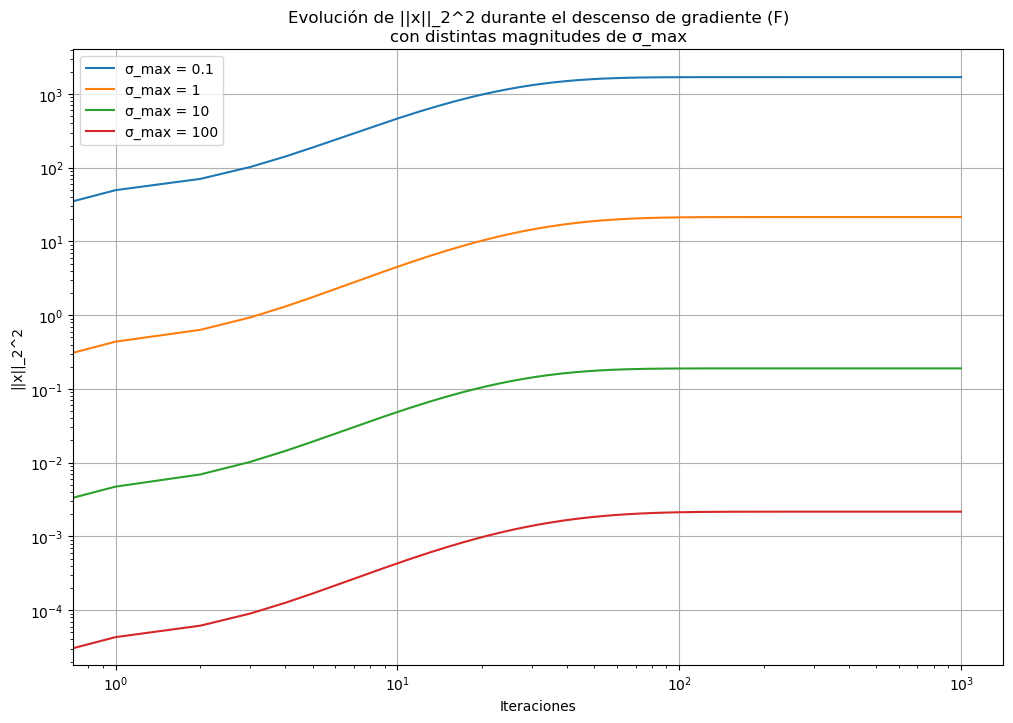

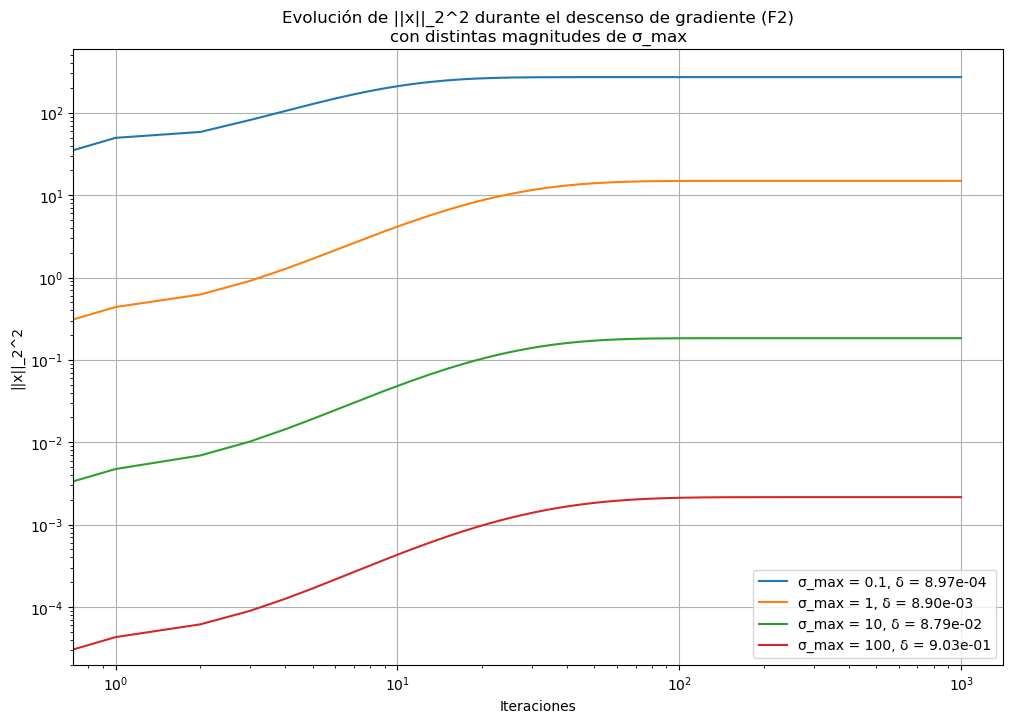

In [14]:
# ||x||^2 vs iteraciones
# Parámetros
n, d = 5, 100
b0 = random_vector(n)
x0 = np.zeros(100)
max_iter = 1000

# Generar matrices con diferentes magnitudes de valores singulares
magnitudes = [0.1, 1, 10, 100]
matrices = []
steps = []
deltas = []

for magnitude in magnitudes:
    A = generate_matrix_with_singular_values_magnitudes(n, d, magnitude)
    _, s, _ = np.linalg.svd(2 * A.T @ A, full_matrices=False)
    step = 1 / max(s)
    _, s, _ = np.linalg.svd(A, full_matrices=False)
    delta = (10**(-2)) * max(s)
    
    matrices.append(A)
    steps.append(step)
    deltas.append(delta)

# Gráfico para F
plt.figure(figsize=(12, 8))

for i, (A, step) in enumerate(zip(matrices, steps)):
    xs = gradient_descent(A, b0, x0, step, 0, max_iter)  # delta = 0 para F
    norm_x_squared = [np.linalg.norm(x)**2 for x in xs]
    
    plt.plot(range(len(norm_x_squared)), norm_x_squared, 
             label=f'σ_max = {magnitudes[i]}')

plt.xlabel('Iteraciones')
plt.ylabel('||x||_2^2')
plt.title('Evolución de ||x||_2^2 durante el descenso de gradiente (F)\ncon distintas magnitudes de σ_max')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico para F2
plt.figure(figsize=(12, 8))

for i, (A, step, delta) in enumerate(zip(matrices, steps, deltas)):
    xs = gradient_descent(A, b0, x0, step, delta, max_iter)
    norm_x_squared = [np.linalg.norm(x)**2 for x in xs]
    
    plt.plot(range(len(norm_x_squared)), norm_x_squared, 
             label=f'σ_max = {magnitudes[i]}, δ = {delta:.2e}')

plt.xlabel('Iteraciones')
plt.ylabel('||x||_2^2')
plt.title('Evolución de ||x||_2^2 durante el descenso de gradiente (F2)\ncon distintas magnitudes de σ_max')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

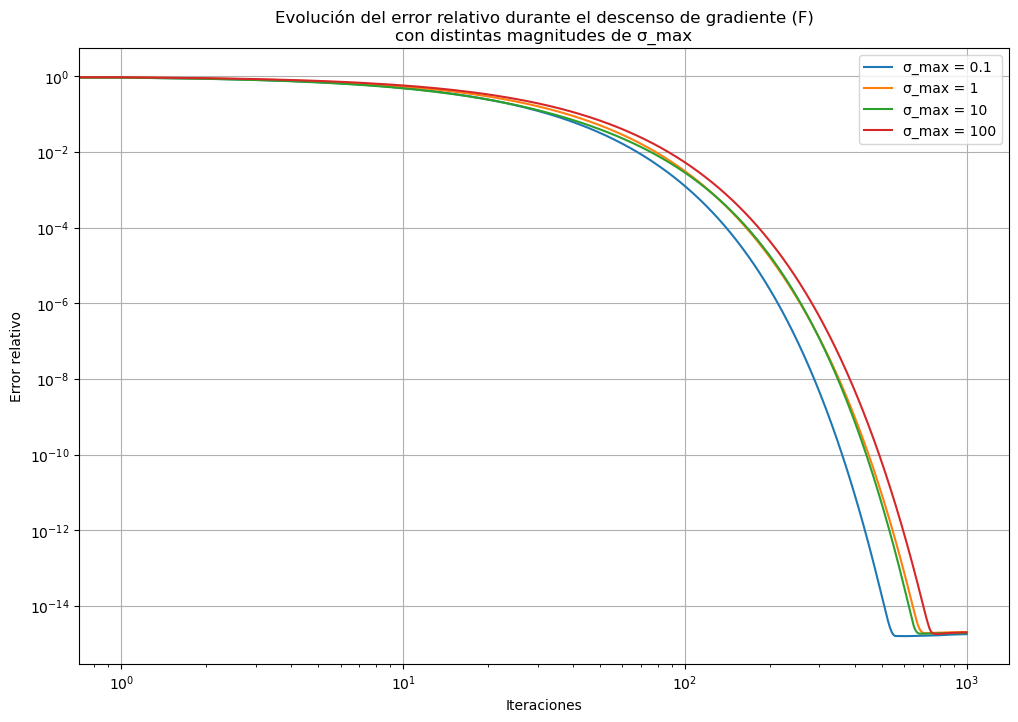

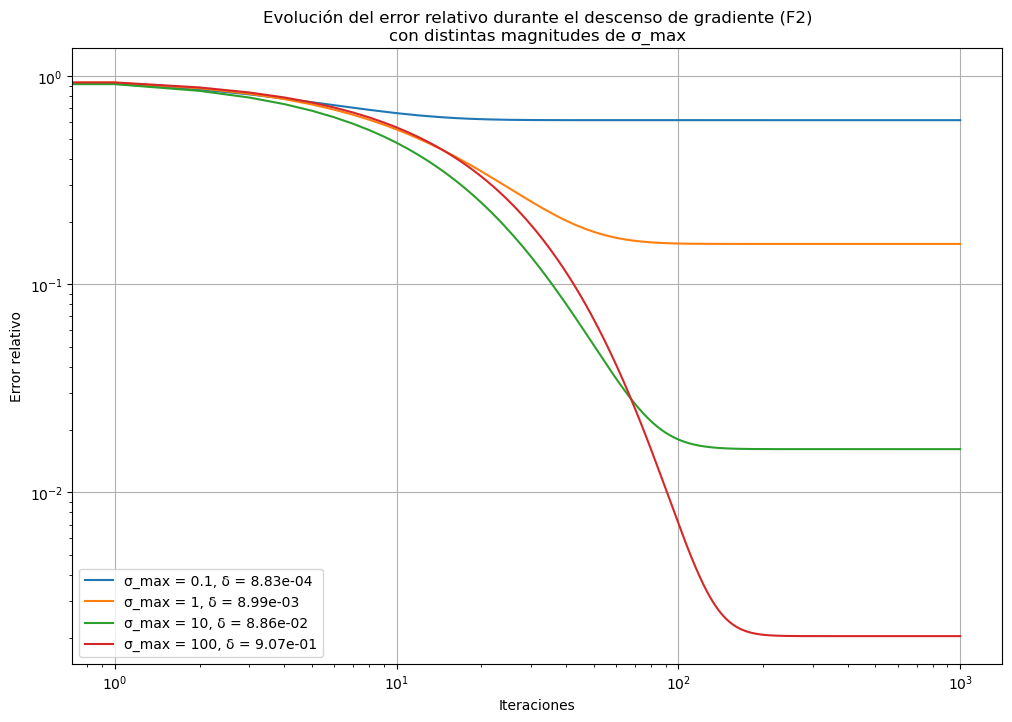

In [15]:
#errores relativos con SVD F
# Parámetros
n, d = 5, 100
b0 = random_vector(n)
x0 = np.zeros(100)
max_iter = 1000

# Generar matrices con diferentes magnitudes de valores singulares
magnitudes = [0.1, 1, 10, 100]
matrices = []
steps = []
deltas = []
x_optimos = []

for magnitude in magnitudes:
    A = generate_matrix_with_singular_values_magnitudes(n, d, magnitude)
    _, s, _ = np.linalg.svd(2 * A.T @ A, full_matrices=False)
    step = 1 / max(s)
    _, s, _ = np.linalg.svd(A, full_matrices=False)
    delta = (10**(-2)) * max(s)
    
    matrices.append(A)
    steps.append(step)
    deltas.append(delta)
    
    # Calcular la solución óptima usando SVD
    x_optimo = SVD_solution(A, b0)
    x_optimos.append(x_optimo)

# Gráfico para F
plt.figure(figsize=(12, 8))

for i, (A, step, x_optimo) in enumerate(zip(matrices, steps, x_optimos)):
    xs = gradient_descent(A, b0, x0, step, 0, max_iter)  # delta = 0 para F
    errores_relativos = [np.linalg.norm(x - x_optimo) / np.linalg.norm(x_optimo) for x in xs]
    
    plt.plot(range(len(errores_relativos)), errores_relativos, 
             label=f'σ_max = {magnitudes[i]}')

plt.xlabel('Iteraciones')
plt.ylabel('Error relativo')
plt.title('Evolución del error relativo durante el descenso de gradiente (F)\ncon distintas magnitudes de σ_max')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico para F2
plt.figure(figsize=(12, 8))

for i, (A, step, delta, x_optimo) in enumerate(zip(matrices, steps, deltas, x_optimos)):
    xs = gradient_descent(A, b0, x0, step, delta, max_iter)
    errores_relativos = [np.linalg.norm(x - x_optimo) / np.linalg.norm(x_optimo) for x in xs]
    
    plt.plot(range(len(errores_relativos)), errores_relativos, 
             label=f'σ_max = {magnitudes[i]}, δ = {delta:.2e}')

plt.xlabel('Iteraciones')
plt.ylabel('Error relativo')
plt.title('Evolución del error relativo durante el descenso de gradiente (F2)\ncon distintas magnitudes de σ_max')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.legend()
plt.show()

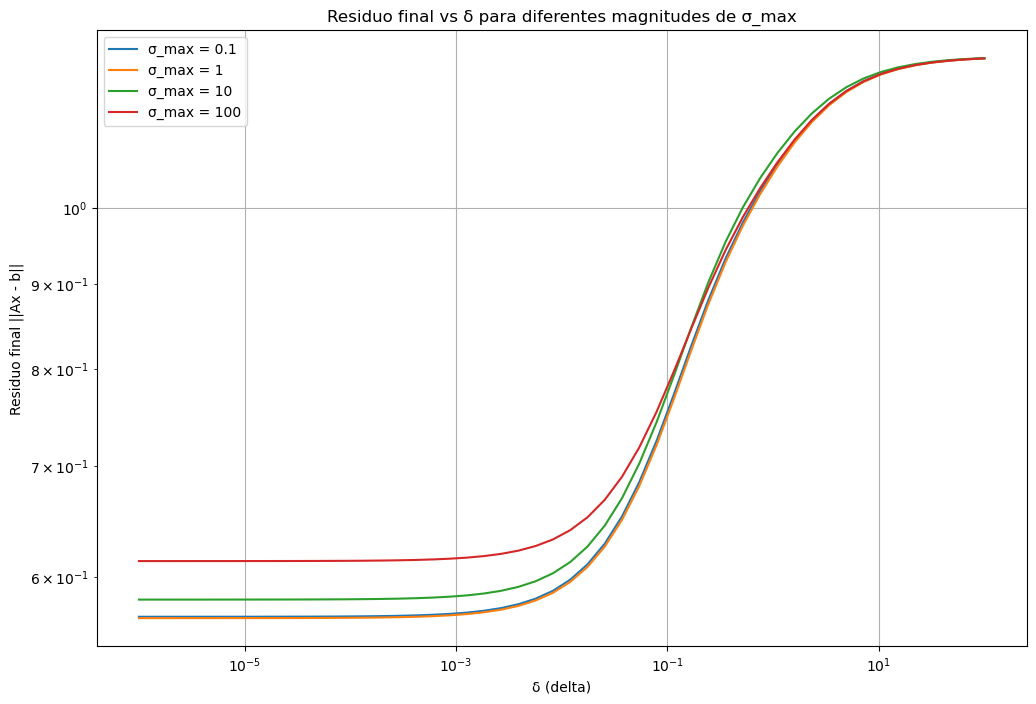

In [16]:
#residuo final vs delta

# Función de normalización
def normalize_matrix(A):
    return A / np.linalg.norm(A)

# Modificar la función gradient_descent
def gradient_descent(A, b, x0, step, delta, max_iter):
    x = x0.astype(np.longdouble)
    xs = [x]
    A = A.astype(np.longdouble)
    b = b.astype(np.longdouble)
    step = np.longdouble(step)
    delta = np.longdouble(delta)
    
    for i in range(max_iter - 1):
        gradiente = gradiente_F2(A, b, x, delta)
        if np.any(np.isnan(gradiente)) or np.any(np.isinf(gradiente)):
            print(f"Gradient descent stopped at iteration {i} due to numerical instability")
            break
        x_new = x - step * gradiente
        if np.any(np.isnan(x_new)) or np.any(np.isinf(x_new)):
            print(f"Gradient descent stopped at iteration {i} due to numerical instability")
            break
        x = x_new
        xs.append(x)
    return xs

# Resto del código...

# Generar matrices con diferentes magnitudes de valores singulares
magnitudes = [0.1, 1, 10, 100]
matrices = []
steps = []

for magnitude in magnitudes:
    A = generate_matrix_with_singular_values_magnitudes(n, d, magnitude)
    A = normalize_matrix(A)  # Normalizar A
    _, s, _ = np.linalg.svd(2 * A.T @ A, full_matrices=False)
    step = 0.01 / max(s)  # Reducir el tamaño del paso
    
    matrices.append(A)
    steps.append(step)

# Valores de delta a probar
deltas = np.logspace(-6, 2, 50)  # 50 valores de delta entre 10^-6 y 10^2

plt.figure(figsize=(12, 8))

for i, (A, step) in enumerate(zip(matrices, steps)):
    residuos = []
    for delta in deltas:
        xs = gradient_descent(A, b0, x0, step, delta, max_iter)
        x_final = xs[-1]
        residuo = np.linalg.norm(A @ x_final - b0)
        residuos.append(residuo)
    
    plt.plot(deltas, residuos, label=f'σ_max = {magnitudes[i]}')

plt.xlabel('δ (delta)')
plt.ylabel('Residuo final ||Ax - b||')
plt.title('Residuo final vs δ para diferentes magnitudes de σ_max')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

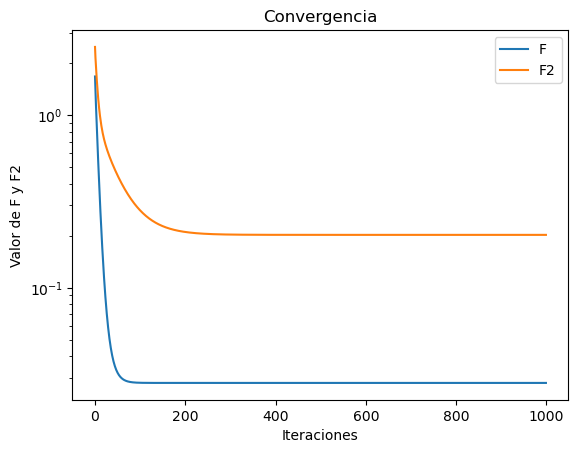

In [17]:
# convergencia
# Generar matriz A y vector b
n, d = 5, 100
A = generate_matrix_with_singular_values_magnitudes(n, d, 1)
b = np.random.randn(n)

# Descenso de gradiente con F
x0 = np.random.randn(d)
max_iter = 1000

autovaloresA = np.linalg.svd(A, full_matrices=False)[1]
autovaloresH = np.linalg.eigvalsh(2 * A.T @ A)
delta = 10**(-2)*np.max(np.diag(autovaloresA))
step = 1 / np.max(autovaloresH)

xs_F = gradient_descent(A, b, x0, step, delta, max_iter)
xs_F2 = gradient_descent(A, b, x0, step, delta, max_iter)

# Graficar la convergencia
iters = range(len(xs_F))
F_vals = [F(A, x, b) for x in xs_F]
F2_vals = [F2(A, x, b, delta) for x in xs_F2]

# plt.figure(figsize=(14, 7))

# Convergencia de F
plt.plot(iters, F_vals, label='F')
# Convergencia de F2
plt.plot(iters, F2_vals, label='F2')
plt.xlabel('Iteraciones')
plt.ylabel('Valor de F y F2')
plt.title('Convergencia')
plt.legend()

plt.yscale('log')


plt.show()


/tmp/ipykernel_105612/4021191115.py:54: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1e6)


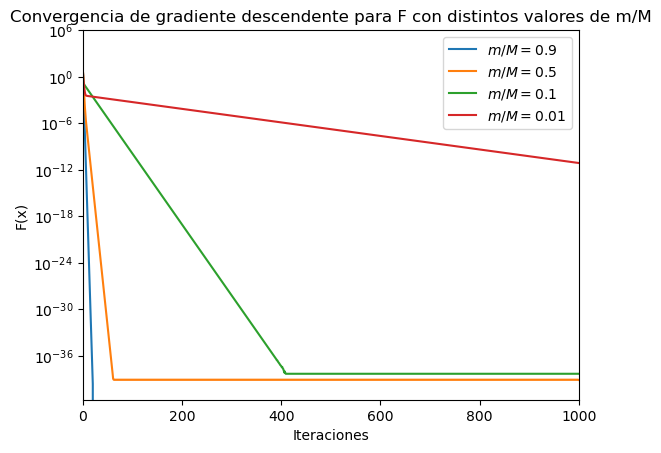

In [18]:

def matriz_A_con_hessiano_especifico(n, min_autovalor, max_autovalor):
    # Crear una matriz diagonal con autovalores en el rango deseado
    autovalores = np.linspace(min_autovalor, max_autovalor, n)
    D = np.diag(autovalores)
    
    # Crear una matriz ortogonal aleatoria
    Q, _ = np.linalg.qr(np.random.randn(n, n))
    
    # Construir el Hessiano deseado
    H = Q @ D @ Q.T
    
    # Dado que el Hessiano es 2A^TA, necesitamos encontrar A
    # Podemos usar la raíz cuadrada de H/2
    A = np.linalg.cholesky(H / 2)
    
    return A

# Ejemplo de uso
n = 3  # Dimensión de la matriz A
min_autovalor = 1
max_autovalor = 10

# m/M = 0.9
A0 = matriz_A_con_hessiano_especifico(n, 9, 10)

# m/M = 0.5
A1 = matriz_A_con_hessiano_especifico(n, 5, 10)

# m/M = 0.1
A2 = matriz_A_con_hessiano_especifico(n, 1, 10)

# m/M = 1000
A3 = matriz_A_con_hessiano_especifico(n, .1, 10)

#Gráfico de la convergencia del método de gradiente descendiente para cada una de las matrices A
b0 = random_vector(n)
x0 = random_vector(n)

delta = 0
step0 = 1 / max(np.linalg.svd(2 * A0.T @ A0, full_matrices=False)[1])
step1 = 1 / max(np.linalg.svd(2 * A1.T @ A1, full_matrices=False)[1])
step2 = 1 / max(np.linalg.svd(2 * A2.T @ A2, full_matrices=False)[1])
step3 = 1 / max(np.linalg.svd(2 * A3.T @ A3, full_matrices=False)[1])

plt.plot([F(A0, x, b0) for x in gradient_descent(A0, b0, x0, step0, delta, 1000)], label=r'$m/M = 0.9$')
plt.plot([F(A1, x, b0) for x in gradient_descent(A1, b0, x0, step1, delta, 1000)], label=r'$m/M = 0.5$')
plt.plot([F(A2, x, b0) for x in gradient_descent(A2, b0, x0, step2, delta, 1000)], label=r'$m/M = 0.1$')
plt.plot([F(A3, x, b0) for x in gradient_descent(A3, b0, x0, step3, delta, 1000)], label=r'$m/M = 0.01$')
plt.yscale('log')
plt.xlabel('Iteraciones')
plt.ylabel('F(x)')
plt.title('Convergencia de gradiente descendente para F con distintos valores de m/M')
plt.xlim(0, 1000)
plt.ylim(0, 1e6)
plt.legend()
plt.show()




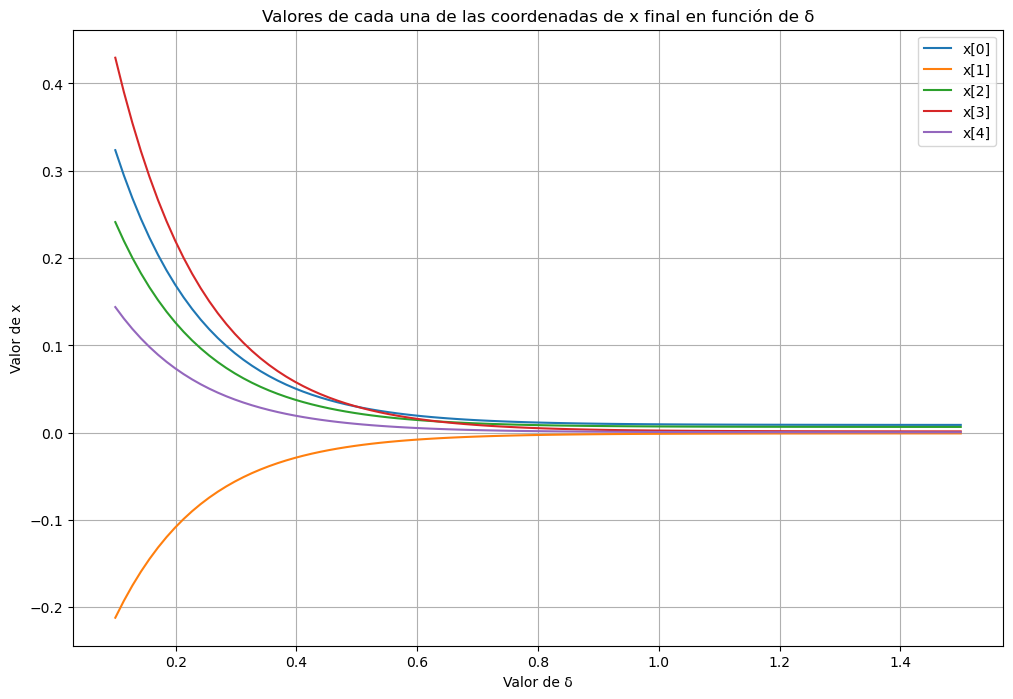

In [35]:
#Gráfico de los valores de cada una de las coordenadas de x final en función del valor de delta

A0 = np.random.randn(5, 100)
n = 5
d = 100
b0 = random_vector(n)
x0 = random_vector(d)

step0 = 1 / max(np.linalg.svd(2 * A0.T @ A0, full_matrices=False)[1])

deltas = np.linspace(0.1, 1.5, 100)
x_finals = []

for delta in deltas:
    x_final = gradient_descent(A0, b0, x0, step0, delta, 1000)[-1]
    x_finals.append(x_final)

x_finals = np.array(x_finals)

plt.figure(figsize=(12, 8))

for i in range(n):
    plt.plot(deltas, x_finals[:, i], label=f'x[{i}]')

plt.xlabel('Valor de δ')
plt.ylabel('Valor de x')
plt.title('Valores de cada una de las coordenadas de x final en función de δ')
plt.legend()
plt.grid(True)
plt.show()


